In [1]:
!git clone https://github.com/akashsannala/Real-Estate-Progression.git

Cloning into 'Real-Estate-Progression'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 28 (delta 1), reused 20 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 141.44 KiB | 23.57 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
%cd Real-Estate-Progression

/content/Real-Estate-Progression


In [3]:
!ls


phase1	README.md


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [ ]:
import os

# List all files in the root /content directory

print(os.listdir("/content/Real-Estate-Progression/phase1"))


['building count detection.ipynb', 'City']


# Re-Design the Roboflow model

In [ ]:
from roboflow import Roboflow

import os



# Initialize Roboflow with your API key (get it for free at https://roboflow.com)

rf = Roboflow(api_key="pWBc4IeSKBfxfVu2vOcR")



# Load a public "building detection" model (customize if you have another model)

project = rf.workspace().project("building-detection-model")

model = project.version(1).model



# Path to the "city" folder

city_folder = "/content/Real-Estate-Progression/phase1/City"



# Ensure the folder exists

if not os.path.exists(city_folder):

    raise FileNotFoundError("❌ 'city' folder not found.")



# Process each image and detect houses

for filename in os.listdir(city_folder):

    image_path = os.path.join(city_folder, filename)



    if filename.endswith(('.jpg', '.jpeg', '.png')):

        # Predict using the model

        result = model.predict(image_path).json()



        # Count houses detected

        house_count = len(result["predictions"])



        # Rename the image to include the house count

        name, ext = os.path.splitext(filename)

        new_filename = f"{name}_Houses_{house_count}{ext}"

        os.rename(image_path, os.path.join(city_folder, new_filename))



        print(f"✅ Updated: {filename} → {new_filename}")



print("🎯 Detection completed successfully!")

ModuleNotFoundError: No module named 'roboflow'

In [4]:
import os
from PIL import Image

# Define input and output folders
input_folder = "/content/Real-Estate-Progression/phase1/City"  # Change this to your actual folder path
output_folder = "/content/bw_images"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all image files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Check for valid image formats
        img_path = os.path.join(input_folder, filename)

        # Open image and convert to black & white
        img = Image.open(img_path).convert('L')

        # Save the new image
        img.save(os.path.join(output_folder, filename))

print("All images have been converted to black and white!")


All images have been converted to black and white!


In [5]:
import cv2
import numpy as np

def get_best_min_area(image):
    """
    Dynamically determines the best min_area value for detecting structures
    based on the image's contours.

    Parameters:
        image (numpy.ndarray): Input grayscale image.

    Returns:
        float: Best min_area value for contour filtering.
    """
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Adaptive Thresholding (better for varying lighting conditions)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Compute area of each contour
    contour_areas = [cv2.contourArea(cnt) for cnt in contours]

    if not contour_areas:  # If no contours found, return a small default value
        return 100

    # Compute median and mean contour area
    median_area = np.median(contour_areas)
    mean_area = np.mean(contour_areas)

    # Set min_area to a fraction of median (ensuring it's not too small)
    best_min_area = max(median_area * 0.5, mean_area * 0.3, 100)

    return best_min_area


In [6]:
# Process each image in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Get best min_area dynamically
        min_area = get_best_min_area(image)
        print(f"Using min_area = {min_area} for {filename}")

        # Apply Gaussian Blur to reduce noise
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Apply Adaptive Thresholding
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours by computed min_area
        filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

        # Draw detected structures
        output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

        # Save processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, output_image)

        print(f"{filename}: {len(filtered_contours)} structures detected and saved!")


Using min_area = 100 for 005.jpg
005.jpg: 1 structures detected and saved!
Using min_area = 7009.875 for 002.jpg
002.jpg: 1 structures detected and saved!
Using min_area = 100 for 009.jpg
009.jpg: 21 structures detected and saved!
Using min_area = 100 for 007.jpg
007.jpg: 11 structures detected and saved!
Using min_area = 100 for 001.jpg
001.jpg: 8 structures detected and saved!
Using min_area = 100 for 006.jpg
006.jpg: 12 structures detected and saved!
Using min_area = 100 for 003.jpg
003.jpg: 29 structures detected and saved!
Using min_area = 100 for 004.jpg
004.jpg: 22 structures detected and saved!
Using min_area = 100 for 008.jpg
008.jpg: 6 structures detected and saved!


In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
# Input and output folder paths
input_folder = "/content/bw_images"
output_folder = "/content/processed_images"

# Create output folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

# Process each image in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Get best min_area dynamically
        min_area = get_best_min_area(image)
        print(f"Using min_area = {min_area} for {filename}")

        # Apply Gaussian Blur to reduce noise
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # Apply Adaptive Thresholding
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours by computed min_area
        filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

        # Draw detected structures
        output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

        # Save processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, thresh)

        # Visualization
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(thresh, cmap='gray')
        plt.title("Thresholded Image")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(output_image)
        plt.title(f"Detected Structures: {len(filtered_contours)}")
        plt.axis('off')

        plt.show()

        print(f"{filename}: {len(filtered_contours)} structures detected and saved!")

print("Processing complete! Check the 'processed_images' folder.")

Output hidden; open in https://colab.research.google.com to view.

# Distinguish the thesholded image , by splitting the joinings of structures

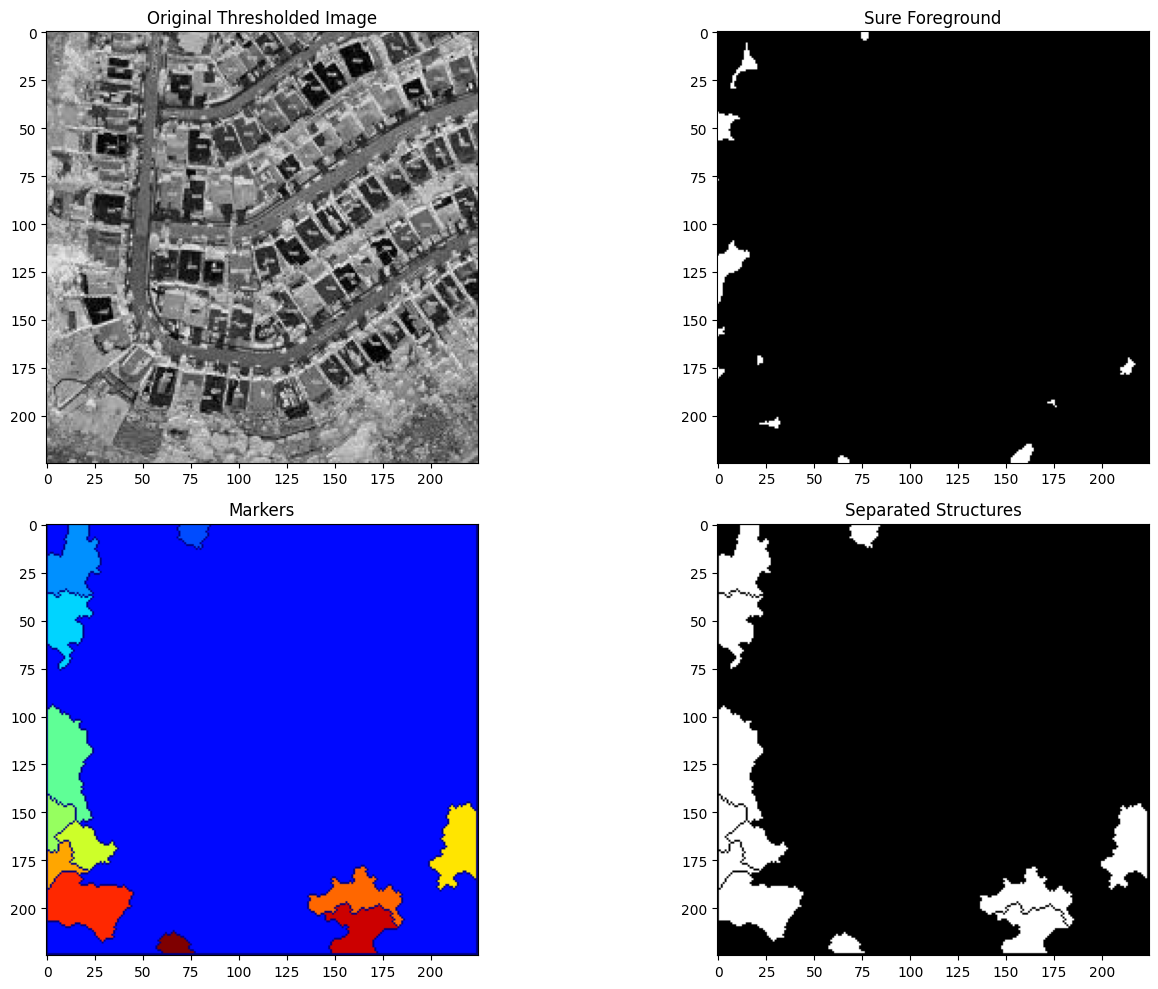

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def separate_structures(image_path):
    # Load the thresholded image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.bitwise_not(img)

    # Ensure binary image (just in case)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Apply morphological operations to help separation
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Perform distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Threshold the distance transform to get markers for watershed
    _, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # Find unknown region (subtract sure foreground from sure background)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Mark the region of unknown with zero
    markers[unknown == 255] = 0

    # Apply watershed algorithm
    color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    markers = cv2.watershed(color_img, markers)

    # Create separated image
    separated = np.zeros_like(img)
    separated[markers > 1] = 255  # -1 is boundaries, >1 are different regions

    # Optional: Draw boundaries between structures
    boundaries = np.zeros_like(img)
    boundaries[markers == -1] = 255

    # Display results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Thresholded Image')

    plt.subplot(2, 2, 2)
    plt.imshow(sure_fg, cmap='gray')
    plt.title('Sure Foreground')

    plt.subplot(2, 2, 3)
    plt.imshow(markers, cmap='jet')
    plt.title('Markers')

    plt.subplot(2, 2, 4)
    plt.imshow(separated, cmap='gray')
    plt.title('Separated Structures')

    plt.tight_layout()
    plt.show()

    return separated, boundaries ,markers

# Usage
separated_image, boundaries , markers = separate_structures('/content/Real-Estate-Progression/phase1/City/008.jpg')

In [10]:
def count_structures(markers):
    """
    Count the number of separated structures from watershed markers

    Args:
    markers: The markers array from cv2.watershed()

    Returns:
    int: Number of separated structures
    """
    # The markers array has:
    # -1 for watershed boundaries
    # 1 for background
    # Values >1 for each individual structure

    # Get all unique labels (excluding boundaries and background)
    unique_labels = np.unique(markers)
    structure_labels = unique_labels[unique_labels > 1]  # Exclude background (1) and boundaries (-1)

    return len(structure_labels)

# After your watershed code, count the structures
num_structures = count_structures(markers)
print(f"Number of separated structures: {num_structures}")

Number of separated structures: 12


# Creating a csv file with image and number of structures

In [11]:
import os
import cv2
import csv
import matplotlib.pyplot as plt

# Input and output folder paths
input_folder = "/content/bw_images"
output_folder = "/content/processed_images"
csv_file_path = "/content/structure_counts.csv"  # CSV file to store results

# Create output folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

# Create or open CSV file and write headers
with open(csv_file_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Image Filename', 'Number of Structures Detected'])  # CSV headers

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)

            # Load image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Get best min_area dynamically
            min_area = get_best_min_area(image)
            print(f"Using min_area = {min_area} for {filename}")

            # Apply Gaussian Blur to reduce noise
            blurred = cv2.GaussianBlur(image, (5, 5), 0)

            # Apply Adaptive Thresholding
            thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY_INV, 11, 2)

            # Find contours
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Filter contours by computed min_area
            filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

            # Draw detected structures
            output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            cv2.drawContours(output_image, filtered_contours, -1, (0, 255, 0), 2)

            # Save processed image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, thresh)

            # Visualization
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(image, cmap='gray')
            plt.title("Original Image")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(thresh, cmap='gray')
            plt.title("Thresholded Image")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(output_image)
            plt.title(f"Detected Structures: {len(filtered_contours)}")
            plt.axis('off')

            plt.show()

            print(f"{filename}: {len(filtered_contours)} structures detected and saved!")

            # Write the filename and number of structures to the CSV file
            with open(csv_file_path, mode='a', newline='') as csv_file:
                writer = csv.writer(csv_file)
                writer.writerow([filename, len(filtered_contours)])

print("Processing complete! Check the 'processed_images' folder and 'structure_counts.csv'.")


Output hidden; open in https://colab.research.google.com to view.

In [13]:
!git config --global user.email "akash2004sv@gmail.com"
!git config --global user.name "akashsannala"



In [20]:
# Copy your notebook to the repo directory
!cp /content/structuredetection.ipynb ./structuredetection.ipynb



cp: cannot stat '/content/structuredetection.ipynb': No such file or directory


In [ ]:

# Add the notebook, commit, and push to GitHub
!git add structuredetection.ipynb
!git commit -m "Add notebook from Colab"
!git push https://github.com/akashsannala/Real-Estate-Progression.git

In [19]:
!ls
%cd ..
!ls

phase1	README.md
/content
bw_images  processed_images  Real-Estate-Progression  sample_data  structure_counts.csv


In [21]:
from getpass import getpass
import os

# Ask for GitHub token (generated from GitHub settings)
token = getpass("Enter your GitHub token: ")
os.environ["GITHUB_TOKEN"] = token


Enter your GitHub token: ··········


In [22]:
!mv /content/structure.ipynb /content/Real-Estate-Progression/


mv: cannot stat '/content/structure.ipynb': No such file or directory


In [23]:
!cp "/content/drive/MyDrive/structure.ipynb" "/content/"


cp: cannot stat '/content/drive/MyDrive/structure.ipynb': No such file or directory


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
!ls /content/drive/MyDrive/


'Academic_CV_Template (1).pdf'	 SAVE_20250313_134556.jpg
 Academic_CV_Template.pdf	 Screenshot_2024-04-01-18-41-17-845_com.phonepe.app.jpg
'Colab Notebooks'		'Screenshot_2024-11-05-22-23-43-924_com (1).phonepe.app.jpg'
 IMG-20240222-WA0012.jpg	 Screenshot_2024-11-05-22-23-43-924_com.phonepe.app.jpg
 jakes-resume.pdf		 Screenshot_2025-02-19-21-15-25-501_com.phonepe.app.jpg
'Resume (1) (1).pdf'		 Screenshot_2025-02-26-17-19-30-144_com.phonepe.app.jpg
'resume (1).pdf'		 Screenshot_2025-02-28-11-34-59-844_com.phonepe.app.jpg
'Resume (1).pdf'		 Screenshot_2025-02-28-20-44-18-430_com.phonepe.app.jpg
'resume (2).pdf'		 Screenshot_2025-03-04-15-58-39-340_com.phonepe.app.jpg
 resume.pdf			'Untitled spreadsheet.gsheet'


In [26]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


'building count detection.ipynb'   Untitled	     Untitled1.ipynb
 structuredetection.ipynb	   Untitled0.ipynb
